# **Nama  : Charles Dometian**
# **Email : charles.dometian@gmail.com**

# Library yang digunakan

In [ ]:
# Import library
!pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load data

In [ ]:
# Load data
from tensorflow.keras.datasets import fashion_mnist

# Load the training and test split of the fashio_mnist dataset
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_shape = training_images.shape
test_shape = test_images.shape

print(f'Terdapat {train_shape[0]} contoh dengan bentuk ({train_shape[1]}, {train_shape[2]}) pada data gambar latih')
print(f'Terdapat {test_shape[0]} contoh dengan bentuk ({test_shape[1]}, {test_shape[2]}) pada data gambar uji')

Terdapat 60000 contoh dengan bentuk (28, 28) pada data gambar latih
Terdapat 10000 contoh dengan bentuk (28, 28) pada data gambar uji


In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data if needed
x_train = x_train.reshape(-1, 28, 28, 1)  # If using Conv2D layers
x_test = x_test.reshape(-1, 28, 28, 1)  # If using Conv2D layers

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)



11490434/11490434 [==============================] - 0s 0us/step


Terdapat 60000 contoh dengan bentuk (28, 28) pada data gambar latih
Terdapat 10000 contoh dengan bentuk (28, 28) pada data gambar uji


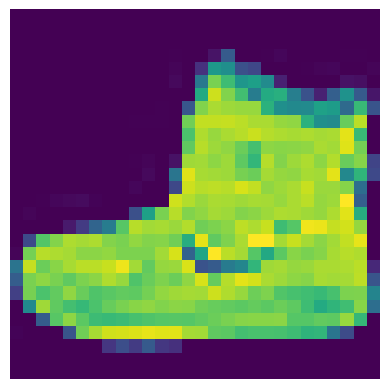

In [ ]:
print(f'Terdapat {train_shape[0]} contoh dengan bentuk ({train_shape[1]}, {train_shape[2]}) pada data gambar latih')
print(f'Terdapat {test_shape[0]} contoh dengan bentuk ({test_shape[1]}, {test_shape[2]}) pada data gambar uji')

plt.imshow(training_images[0])
plt.axis('off')
plt.show()

In [ ]:
# Set number of characters per row when printing
np.set_printoptions(linewidth=320)
print(f'Bentuk dari sisi data: \n {training_images[3]}')

Bentuk dari sisi data: 
 [[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194 102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179 186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152 148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140 137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131 131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119 140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117 127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119 127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 156 129 112 110 1

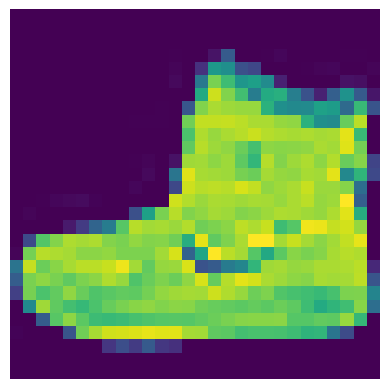

LABEL: 9


In [ ]:
plt.imshow(training_images[0])
plt.axis('off')
plt.show()
print(f'LABEL: {training_labels[0]}')

In [ ]:
# Set number of characters per row when printing
np.set_printoptions(linewidth=320)
print(f'Bentuk dari sisi data: \n {training_images[3]}')

Bentuk dari sisi data: 
 [[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194 102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179 186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152 148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140 137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131 131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119 140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117 127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119 127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 156 129 112 110 1

# Data Processing

In [ ]:
# Normalisasi nilai piksel
training_images = training_images / 255.0
test_images = test_images / 255.0

# One-hot encoding
training_labels = to_categorical(training_labels)
test_labels = to_categorical(test_labels)

#Membuat callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nAkurasi tinggi, batalkan training!")
      self.model.stop_training = True

callbacks = myCallback()

# Membangun Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))  # Dropout layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
# Use data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
)

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, epochs=15, batch_size=32, callbacks=[callbacks], verbose=1, shuffle=True, validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 [==============================] - 24s 5ms/step - loss: 0.4831 - accuracy: 0.8297 - val_loss: 0.3748 - val_accuracy: 0.8697
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3625 - accuracy: 0.8719 - val_loss: 0.3373 - val_accuracy: 0.8825
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3374 - accuracy: 0.8798 - val_loss: 0.3217 - val_accuracy: 0.8865
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3177 - accuracy: 0.8857 - val_loss: 0.3051 - val_accuracy: 0.8888
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3033 - accuracy: 0.8911 - val_loss: 0.2965 - val_accuracy: 0.8938
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2973 - accuracy: 0.8935 - val_loss: 0.2947 - val_accuracy: 0.8972
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2879 - accuracy: 0.8967 - val_loss: 0.3017 - val_accuracy

# Grafik

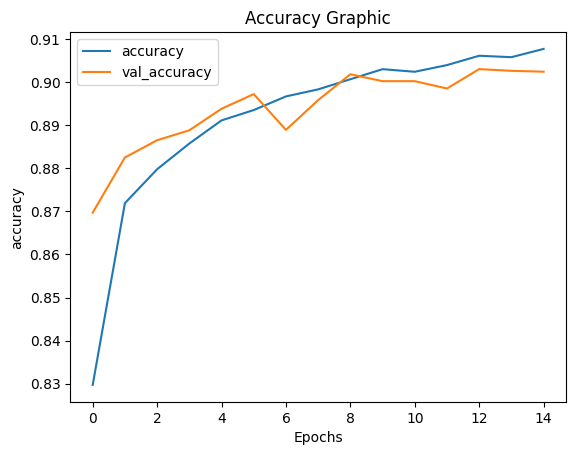

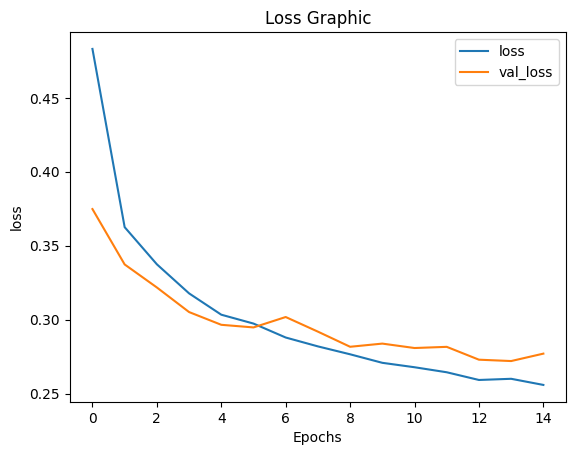

In [ ]:
def plot_graphs(history, string, title):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title(title)
  plt.show()

plot_graphs(history, "accuracy", "Accuracy Graphic")
plot_graphs(history, "loss", "Loss Graphic")

# Evaluasi dan Prediksi

In [ ]:
# Mengevaluasi model pada data yang belum dilihat
eval = model.evaluate(test_images, test_labels)
print(f'Test loss: {eval[0]} \nTest accuracy: {eval[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2770 - accuracy: 0.9024
Test loss: 0.276986688375473 
Test accuracy: 0.902400016784668


1/1 [==============================] - 0s 36ms/step


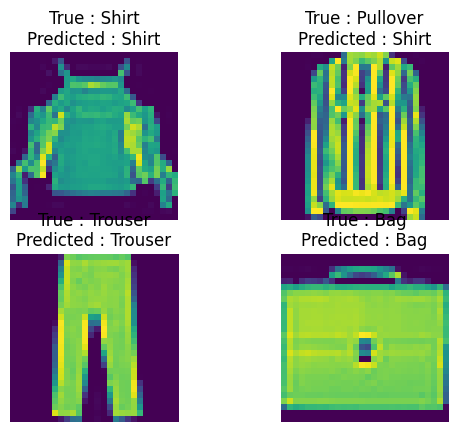

In [ ]:
dict_label = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


def predict():
  some_random_number = np.random.randint(low=0, high=len(test_images)-1, size=4)
  sample_images = training_images[some_random_number]
  sample_label = training_labels[some_random_number]
  predicted = model.predict(sample_images)
  predicted = np.argmax(predicted, axis = 1)
  true_label = np.argmax(sample_label, axis = 1)
  fig, axs = plt.subplots(2, 2)
  for row in range(2):
    for col in range(2):
      if row == 0:
        true = true_label[row+col]
        pred = predicted[row+col]
        axs[row, col].imshow(sample_images[row+col])
      else:
        true = true_label[row+col+1]
        pred = predicted[row+col+1]
        axs[row,col].imshow(sample_images[row+col+1])
      axs[row,col].set_title('True : %s\nPredicted : %s' % (dict_label[true], dict_label[pred]))
      axs[row,col].axis('off')

predict()

